In [ ]:
#import necessary libraries
import tweepy
from textblob import TextBlob


In [ ]:
#Retrieving tweets from twitter 
consumer_key='CbbklaZ4A7iOmpo9ZfsYFuWxU'
consumer_key_secret='RwR6OI6WVJag84B1NIk6OPCd2vv2EwFiBKpU7exePcPIDxWUZc'
access_token='1282233149594800128-kNp1ZvypJxDLjT4A0kOKW2QjZnnBMh'
access_token_secret='MjvpVkdhg5MdROIMFSBDsJt0dH6a0jQFHEFKFQp2LAArb'
auth=tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)


public_tweets=api.search('COVID-19',lang="en",count=100)
for tweet in public_tweets:
  
  print(tweet.created_at)
  print(tweet.text)
  analysis=TextBlob(tweet.text)
  print(analysis.sentiment)
  if analysis.sentiment[0]>0:
    print("Positive")
  elif analysis.sentiment[0]<0:
    print("Negative")
  else:
    print("Neutral")

2020-07-20 16:20:18
Right now, we are all feeling the pinch COVID-19 is delivering, whether it is personal life or business. Unless you… https://t.co/evk65tNFfF
Sentiment(polarity=0.14285714285714285, subjectivity=0.4178571428571428)
Positive
2020-07-20 16:20:17
RT @PostOpinions: Covid-19 is pushing doctors to the brink, writes emergency physician @choo_ek. Medicine needs to recognize we’re human an…
Sentiment(polarity=0.0, subjectivity=0.1)
Neutral
2020-07-20 16:20:17
RT @NJAssemblyGOP: We will continue to fight for transparency because you have a right to know what @GovMurphy
is doing.
https://t.co/xDLEu…
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Positive
2020-07-20 16:20:17
@Bamasgot15 We know COVID-19 is the swing factor so we celebrate!
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
2020-07-20 16:20:17
RT @CMHInnovation: Transitioning from #grade12 into #postsecondary can be a difficult process for students in the best of times and COVID-1…
Sentime

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
i=1
for tweet in public_tweets[0:5]:
  print(str(i)+') '+ tweet.text+'\n')
  i=i+1
df=pd.DataFrame([tweet.text for tweet in public_tweets],columns=['Tweets'])
df['Date']=pd.DataFrame([tweet.created_at for tweet in public_tweets],columns=['Date'])
df.head()

1) Right now, we are all feeling the pinch COVID-19 is delivering, whether it is personal life or business. Unless you… https://t.co/evk65tNFfF

2) RT @PostOpinions: Covid-19 is pushing doctors to the brink, writes emergency physician @choo_ek. Medicine needs to recognize we’re human an…

3) RT @NJAssemblyGOP: We will continue to fight for transparency because you have a right to know what @GovMurphy
is doing.
https://t.co/xDLEu…

4) @Bamasgot15 We know COVID-19 is the swing factor so we celebrate!

5) RT @CMHInnovation: Transitioning from #grade12 into #postsecondary can be a difficult process for students in the best of times and COVID-1…



,Tweets,Date
0,"Right now, we are all feeling the pinch COVID-...",2020-07-20 16:20:18
1,RT @PostOpinions: Covid-19 is pushing doctors ...,2020-07-20 16:20:17
2,RT @NJAssemblyGOP: We will continue to fight f...,2020-07-20 16:20:17
3,@Bamasgot15 We know COVID-19 is the swing fact...,2020-07-20 16:20:17
4,RT @CMHInnovation: Transitioning from #grade12...,2020-07-20 16:20:17


In [ ]:
for i in range(df.shape[0]) :
    df['Tweets'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['Tweets'][i]).split()).lower()
df['Tweets'].head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    right now we are all feeling the pinch covid 1...
1    rt covid 19 is pushing doctors to the brink wr...
2    rt we will continue to fight for transparency ...
3    we know covid 19 is the swing factor so we cel...
4    rt transitioning from grade12 into postseconda...
Name: Tweets, dtype: object

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Date,Subjectivity,Polarity
0,falling progressively fatality rate in india n...,2020-07-20 06:50:41,0.000000,0.000000
1,the demise of tirupati temple s former chief p...,2020-07-20 06:50:41,0.187500,-0.062500
2,that would be awesome maybe then science would...,2020-07-20 06:50:41,1.000000,1.000000
3,rt covid 19 is the catalyst for the nwo there ...,2020-07-20 06:50:41,0.600000,-0.350000
4,what s not safe is the nfls chief medical offi...,2020-07-20 06:50:40,0.564286,-0.191071
...,...,...,...,...
95,rt covid 19 testing update for more details vi...,2020-07-20 06:50:27,0.500000,0.500000
96,frugals holding out as eu leaders fail to agre...,2020-07-20 06:50:27,0.450000,-0.400000
97,rt was supposed to bury my brother yesterday f...,2020-07-20 06:50:27,0.150000,0.000000
98,tanzania safari say yes bestoftanzaniasafari w...,2020-07-20 06:50:27,0.000000,0.000000


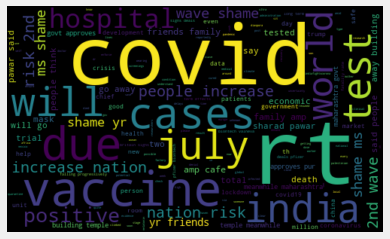

In [ ]:
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Sentiment Analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
df.head()

,Tweets,Date,Subjectivity,Polarity,Analysis
0,falling progressively fatality rate in india n...,2020-07-20 06:50:41,0.000000,0.000000,Neutral
1,the demise of tirupati temple s former chief p...,2020-07-20 06:50:41,0.187500,-0.062500,Negative
2,that would be awesome maybe then science would...,2020-07-20 06:50:41,1.000000,1.000000,Positive
3,rt covid 19 is the catalyst for the nwo there ...,2020-07-20 06:50:41,0.600000,-0.350000,Negative
4,what s not safe is the nfls chief medical offi...,2020-07-20 06:50:40,0.564286,-0.191071,Negative


In [ ]:
#print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) that would be awesome maybe then science would matter again and we could cure covid 19 and climate change

2) global women high heels market size and forecast 2020 due to covid 19 impact womenhighheel marketresearchreport

3) crudeoil dropped marked by growing uncertainty about global recovery in fuel demand as new covid 19 cases surge in several countries

4) amid the covid 19 crisis and the looming economic recession the unit dose drug delivery systems market worldwide w

5) rt i m hearing that some people who test positive for covid 19 antibodies are also being told to self quarantine even if th

6) rt gov t spokesperson oguna denies being hospitalized over covid 19 as two css reportedly test positive

7) rt bbmp covid 19 war room bulletin dated 19 07 2020 total positive cases 31777 total recovered cases 6793 total deaths

8) rt china has emerged first from the economic malaise of the covid 19 pandemic but the question on investors minds is whether th

9) the international semina

In [ ]:
#print all the negative values
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) the demise of tirupati temple s former chief priest srinivasa dikshitulu due to covid 19 is a irrepressible loss fo

2) rt covid 19 is the catalyst for the nwo there s an agenda and it s definitely not good for america or the world

3) what s not safe is the nfls chief medical officer said players will absolutely get sick in train

4) farmers in madhya pradesh are facing a severe cash crunch as they exhausted all their savings during the covid 19 l

5) rt indiafightscorona so september availability quite possible early stage trial data on astrazeneca covid 19 vaccine due monda

6) rt melatonin inhibits covid 19 induced cytokine storm melatonin is inexpensive non toxic over a very wide dose range has a l

7) rt care i hv my home loan with icici bank and due to covid 19 it s quite difficult to adjust all expenses at present

8) rt my dad died from covid 19 working in a nail salon that didn t enforce mask policies and should ve closed two weeks earlier

9) we just lost a colleague due 

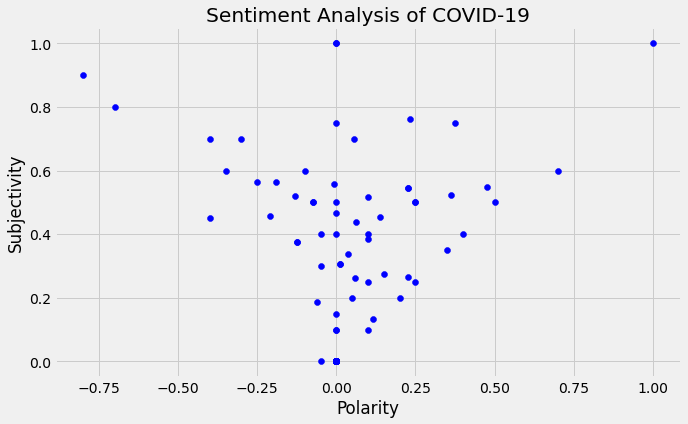

In [ ]:
#Plot the Polarity and Subjectivity
plt.figure(figsize=(10,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis of COVID-19')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#percentage of positive comments
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

31.0

In [ ]:
#percentage of negative comments
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)


20.0

In [ ]:
#percentage of neutral comments
neutweets=df[df.Analysis=='Neutral']
neutweets=neutweets['Tweets']
round((neutweets.shape[0]/df.shape[0])*100,1)

49.0

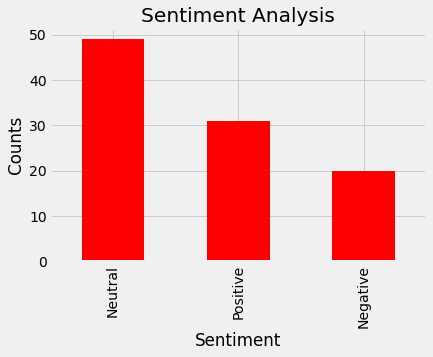

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar',color='red')
plt.show()

Text(0.5, 1.0, 'No. of Tweets per Hour')

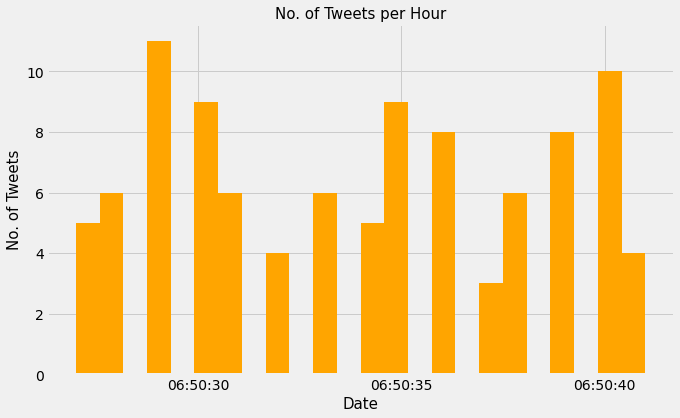

In [ ]:
#Number of tweets per hour
plt.figure(1, figsize=(10,6))
plt.hist(df["Date"],bins = 24,color='orange');
plt.xlabel('Date',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


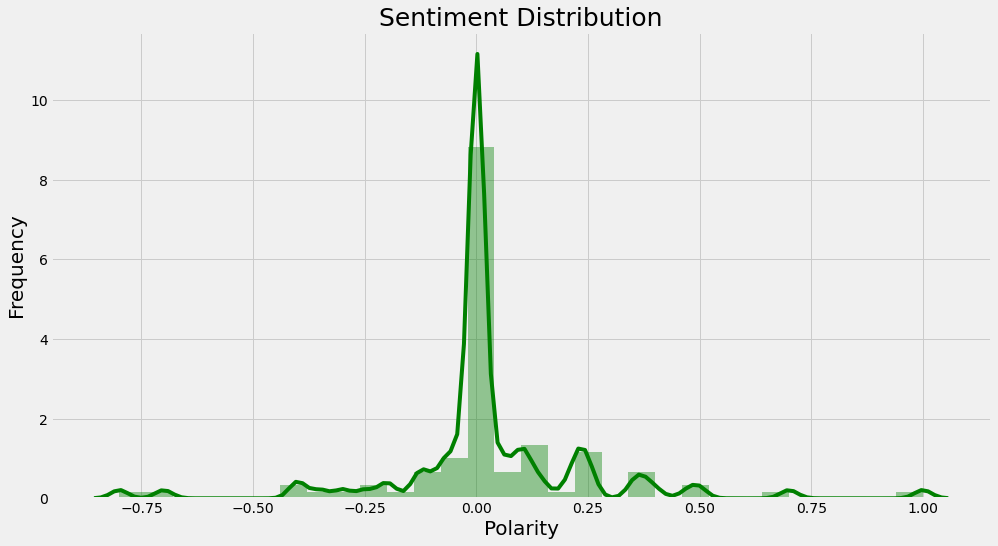

In [ ]:
#Sentiment Distribution
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(df['Polarity'], bins=30,color='green')
plt.title('Sentiment Distribution',size = 25)
plt.xlabel('Polarity',size = 20)
plt.ylabel('Frequency',size = 20)
plt.show();

In [ ]:
#list of stopwords
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [ ]:
#Removing Stop Words
df['Tweets'] = df['Tweets'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word.lower() not in stopwords]))
df['Tweets']

0     falling progressively fatality rate india now ...
1     demise tirupati temple s former chief priest s...
2     awesome maybe science matter cure covid 19 cli...
3     rt covid 19 catalyst nwo s agenda s definitely...
4     s safe nfls chief medical officer said players...
                            ...                        
95    rt covid 19 testing update details visit icmrf...
96    frugals holding eu leaders fail agree 750 bill...
97    rt supposed bury brother yesterday funeral pal...
98    tanzania safari say yes bestoftanzaniasafari b...
99    rt aust s advertising go towards climate denia...
Name: Tweets, Length: 100, dtype: object

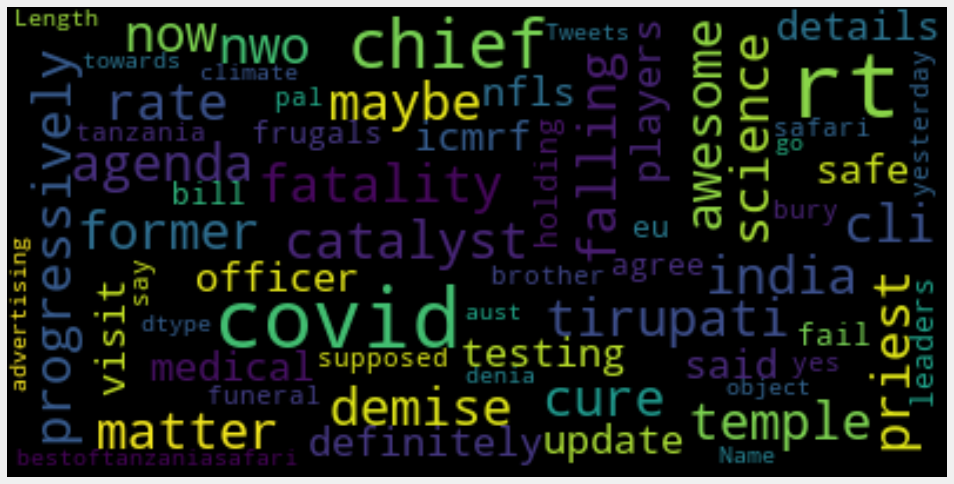

In [ ]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['Tweets'])

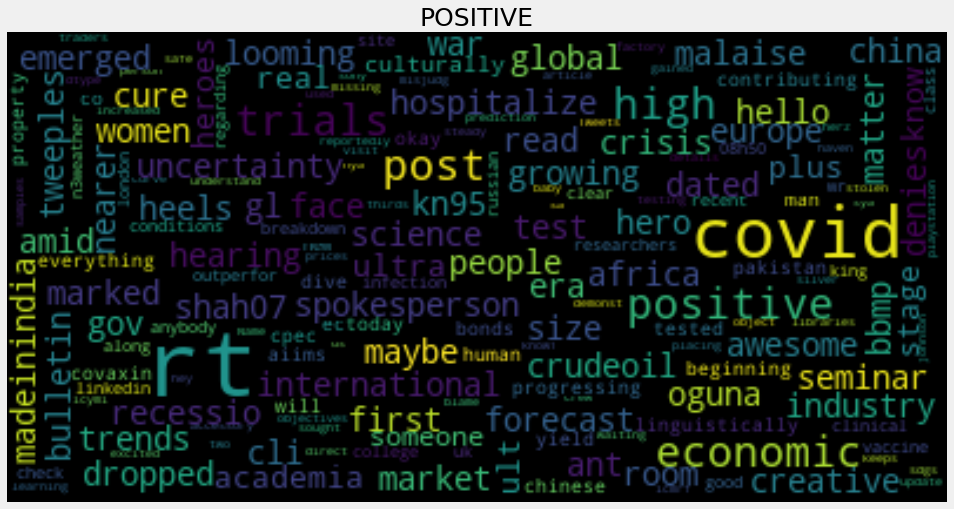

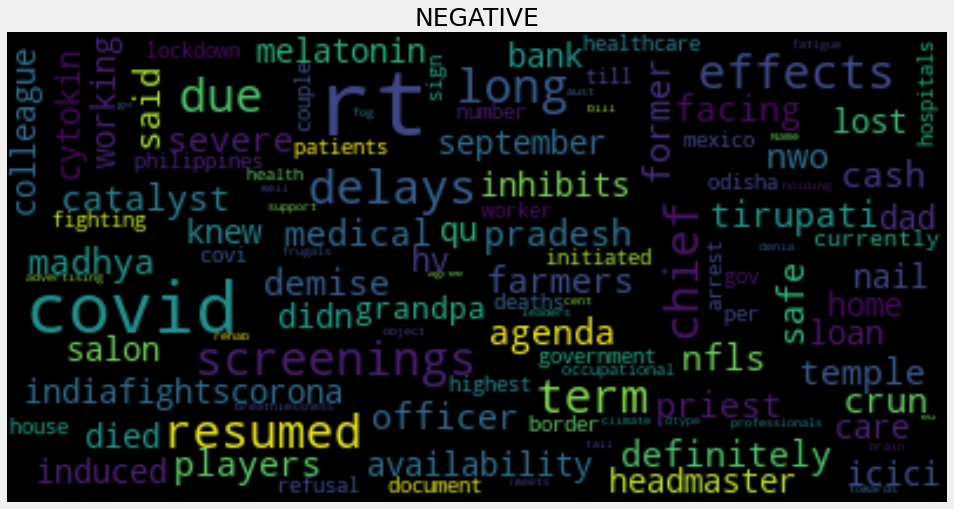

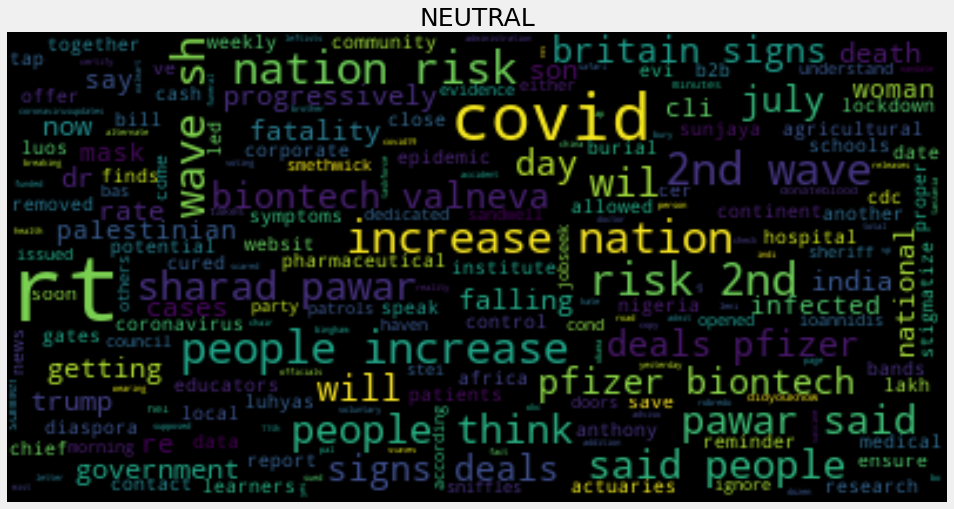

In [ ]:
#Using Word Clouds to see the higher frequency words from each sentiment

pos = df['Tweets'][df['Analysis'] == 'Positive']
show_wordcloud(pos , 'POSITIVE')

neg = df['Tweets'][df['Analysis'] == 'Negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = df['Tweets'][df['Analysis'] == 'Neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [ ]:
#Removing stopwords and counting the occurence of frequently repeated words
import collections
from collections import Counter
df['Tweets'] = df['Tweets'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word.lower() not in stopwords]))

words = []

words = [word for i in df.Tweets for word in i.split()]

In [ ]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,rt,73
1,covid,61
2,19,59
3,s,30
4,people,12


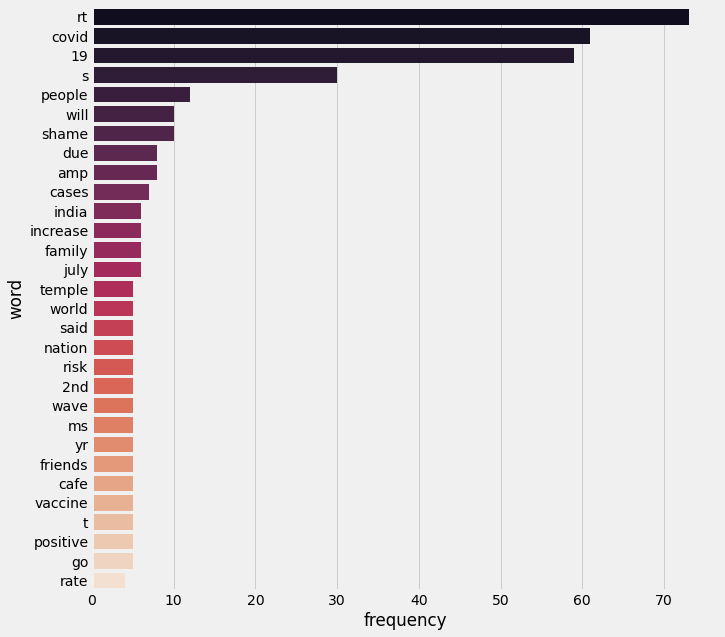

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq,palette='rocket');

In [ ]:
# Bokeh Libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()


In [ ]:

  # create figure 
  p = figure(plot_width = 1000, plot_height = 400,x_axis_label='Polarity',y_axis_label='Subjectivity',title='Sentiment Analysis') 
  p.title.text_font_size = '20pt'
  p.xaxis.axis_label_text_font_size = "20pt"
  p.yaxis.axis_label_text_font_size = "20pt"
    
  # add a line renderer 
  p.hexbin(df['Polarity'],df['Subjectivity'], line_width = 5, color = "green",size=0.2, hover_color="pink", hover_alpha=0.8) 
    
  # Show the plot
  show(p)


In [ ]:
#create figure
p = figure(plot_width=1000, plot_height=400,x_axis_label='Date',title='Sentiment Analysis')
p.title.text_font_size = '20pt'
p.xaxis.axis_label_text_font_size = "20pt"

# add a circle renderer with a size, color, and alpha
p.circle(df['Date'], df['Polarity'], size=15, color="navy", alpha=0.5)
p.circle(df['Date'],df['Subjectivity'],size=15, color="orange", alpha=0.5)

# show the results
show(p)

In [ ]:
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Scatter Plot between polarity and subjectivity',
           x_axis_label = 'Polarity', y_axis_label = 'Subjectivity')
p.circle(df['Polarity'], df['Subjectivity'])
output_notebook()
show(p)

In [ ]:
date=df['Date']
polarity=df['Polarity']
p = figure(x_axis_label='Tweets per hour', y_axis_label='Polarity')
p.line(date,polarity)
p.circle(date,polarity, fill_color='black', size=20)
output_notebook()

show(p)

In [ ]:
import plotly.express as px
data = px.data.gapminder()

data = df[df.Analysis == 'Positive']
fig = px.bar(data, x='Date', y='Polarity',height=400)
fig.show()

In [ ]:
df.columns.tolist()

['Tweets', 'Date', 'Subjectivity', 'Polarity', 'Analysis']